# Testing Predictions of the variants of MILD

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.size'] = '15'

import torch
import os

from mild_hri.utils import *
from mild_hri.dataloaders import *

from scipy.stats import *

import pandas as pd
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import pingouin as pg
import pylab as py

/home/vignesh/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


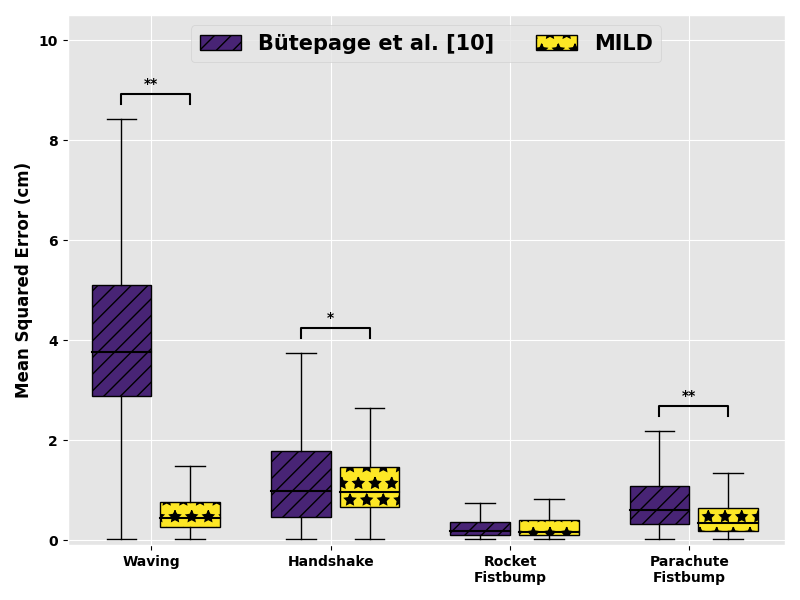

In [2]:
bp_mse = np.load('/home/vignesh/playground/buetepage-phri/logs/mse/bp_hh_20hz_3joints_xvel.npz', allow_pickle=True)['arr_0']
mild_mse = np.load('../logs/mse/bp_hh_20hz_3joints_xvel.npz', allow_pickle=True)['arr_0']

mse = np.concatenate([bp_mse[None], mild_mse], axis=0)
width = 1/(len(mse)+1)
spacing = width+0.05
colors = get_cmap()(np.linspace(0.1,1,len(mse)))
boxplot_kwargs = dict(
	showfliers=False, widths=[width], patch_artist = True,
	medianprops = dict(color = "black", linewidth = 1.5),
	vert=True,
)
legend_props = { "size": 15, "weight":"bold" }

hatches = ['//','*', '+', 'x', 'o', 'O']
actions = ['Waving', 'Handshake', 'Rocket\nFistbump', 'Parachute\nFistbump']
methods = ['Bütepage et al. [10]', 'MILD']
# methods = ['Bütepage et al. [10]', 'MILD v1', 'MILD v2.1', 'MILD v2.2', 'MILD v3.1', 'MILD v3.2']

fig1 = plt.figure(figsize=(len(mse)*4, 6))

ax_box = fig1.add_subplot(1,1,1)
boxes = []
box_y = []
for i in range(len(mse)):
	box_y.append([])
	for a in range(4):
		mse[i, a] = np.array(mse[i, a])*100
		box = ax_box.boxplot(mse[i, a], positions=[a+i*spacing], boxprops = dict(facecolor=colors[i]), **boxplot_kwargs)
		box["boxes"][0].set(hatch=hatches[i])
		box_y[-1].append(box['whiskers'][1].get_ydata()[1])
		if a==0:
			boxes.append(box["boxes"][0])

for i in range(len(mse)):
	for j in range(i+1,len(mse)):
		for a in range(4):
			res = mannwhitneyu(mse[i][a], mse[j][a])
			ymax = max(box_y[i][a], box_y[j][a])
			if res.pvalue < 0.05:
				ax_box.plot([a+i*spacing,a+i*spacing,a+j*spacing,a+j*spacing], [ymax+0.3, ymax+0.5, ymax+0.5, ymax+0.3], 'k-')
				if res.pvalue < 0.01:
					ax_box.text(a+width/2, ymax+0.7, '**', horizontalalignment='center', verticalalignment='center')
				else:
					ax_box.text(a+width/2, ymax+0.7, '*', horizontalalignment='center', verticalalignment='center')

ax_box.set_ylabel('Mean Squared Error (cm)')
ax_box.set_xticks(np.arange(len(actions))+width/2, actions)
ax_box.tick_params(axis='x', colors='black')
ax_box.tick_params(axis='y', colors='black')
ax_box.yaxis.label.set_color('black')
# ax_box.set_yticks(np.arange(5)+1)#, np.arange(5)+1)
ax_box.set_ylim(-0.1, 10.5)
ax_box.set_xlim(-0.3, len(actions)-0.3)
ax_box.legend(boxes, methods, loc='upper center', ncol=len(mse), prop=legend_props)
plt.tight_layout()
plt.savefig('../logs/plots/mse_bp_hh_20hz.pdf')
plt.show()


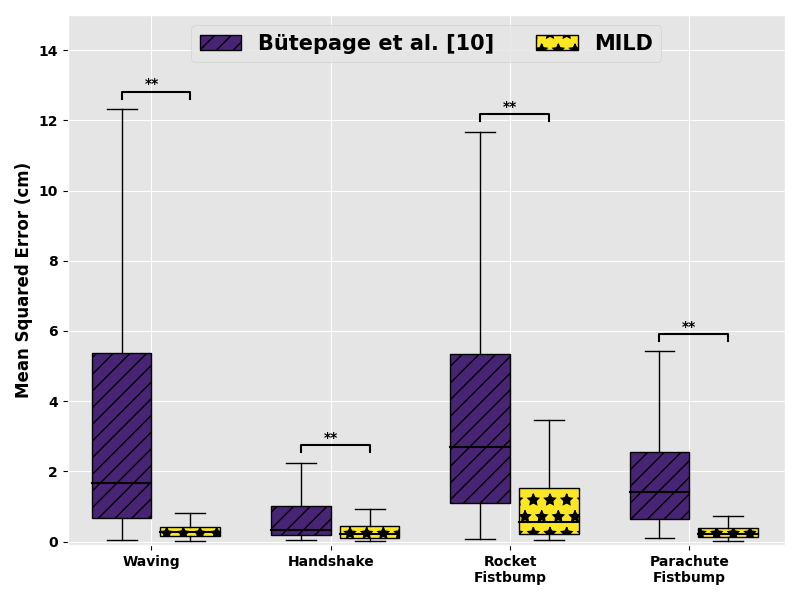

In [3]:
bp_mse = np.load('/home/vignesh/playground/buetepage-phri/logs/mse/nuisihh_3joints_xvel.npz', allow_pickle=True)['arr_0']
mild_mse = np.load('../logs/mse/nuisiv2_3joints_xvel.npz', allow_pickle=True)['arr_0']

mse = np.concatenate([bp_mse[None], mild_mse], axis=0)
width = 1/(len(mse)+1)
spacing = width+0.05
colors = get_cmap()(np.linspace(0.1,1,len(mse)))
boxplot_kwargs = dict(
	showfliers=False, widths=[width], patch_artist = True,
	medianprops = dict(color = "black", linewidth = 1.5),
	vert=True,
)
legend_props = { "size": 15, "weight":"bold" }

hatches = ['//','*', '+', 'x', 'o', 'O']
actions = ['Waving', 'Handshake', 'Rocket\nFistbump', 'Parachute\nFistbump']
methods = ['Bütepage et al. [10]', 'MILD']
# methods = ['Bütepage et al. [10]', 'MILD v1', 'MILD v2.1', 'MILD v2.2', 'MILD v3.1', 'MILD v3.2']

fig1 = plt.figure(figsize=(len(mse)*4, 6))

ax_box = fig1.add_subplot(1,1,1)
boxes = []
box_y = []
for i in range(len(mse)):
	box_y.append([])
	for a in range(4):
		mse[i, a] = np.array(mse[i, a])*100
		box = ax_box.boxplot(mse[i, a], positions=[a+i*spacing], boxprops = dict(facecolor=colors[i]), **boxplot_kwargs)
		box["boxes"][0].set(hatch=hatches[i])
		box_y[-1].append(box['whiskers'][1].get_ydata()[1])
		if a==0:
			boxes.append(box["boxes"][0])

for i in range(len(mse)):
	for j in range(i+1,len(mse)):
		for a in range(4):
			res = mannwhitneyu(mse[i][a], mse[j][a])
			ymax = max(box_y[i][a], box_y[j][a])
			if res.pvalue < 0.05:
				ax_box.plot([a+i*spacing,a+i*spacing,a+j*spacing,a+j*spacing], [ymax+0.3, ymax+0.5, ymax+0.5, ymax+0.3], 'k-')
				if res.pvalue < 0.01:
					ax_box.text(a+width/2, ymax+0.7, '**', horizontalalignment='center', verticalalignment='center')
				else:
					ax_box.text(a+width/2, ymax+0.7, '*', horizontalalignment='center', verticalalignment='center')

ax_box.set_ylabel('Mean Squared Error (cm)')
ax_box.set_xticks(np.arange(len(actions))+width/2, actions)
ax_box.tick_params(axis='x', colors='black')
ax_box.tick_params(axis='y', colors='black')
ax_box.yaxis.label.set_color('black')
# ax_box.set_yticks(np.arange(5)+1)#, np.arange(5)+1)
ax_box.set_ylim(-0.1, 15)
ax_box.set_xlim(-0.3, len(actions)-0.3)
ax_box.legend(boxes, methods, loc='upper center', ncol=len(mse), prop=legend_props)
plt.tight_layout()
plt.savefig('../logs/plots/mse_nuisi_hh.pdf')
plt.show()


0 0 0.000e+00
0 1 1.889e-11
0 2 1.388e-01
0 3 1.578e-01
0 4 3.087e-01
1 1 0.000e+00
1 2 0.000e+00
1 3 0.000e+00
1 4 0.000e+00
2 2 6.221e-14
2 3 1.118e-07
2 4 6.653e-15
3 3 3.703e-03
3 4 5.302e-01
4 4 1.359e-02
5 0 7.299e-130
5 1 5.058e-79
5 2 3.121e-80
5 3 3.108e-99
5 4 1.717e-103
6 1 2.808e-211
6 2 4.636e-212
6 3 3.613e-215
6 4 1.206e-215
7 2 8.623e-01
7 3 9.487e-02
7 4 3.491e-03
8 3 1.038e-01
8 4 6.894e-03
9 4 6.534e-02
10 0 1.400e-136
10 1 9.616e-14
10 2 5.265e-09
10 3 1.736e-06
10 4 1.581e-05
11 1 1.563e-141
11 2 2.093e-143
11 3 4.570e-157
11 4 1.901e-154
12 2 3.609e-02
12 3 2.197e-04
12 4 4.131e-05
13 3 5.044e-02
13 4 2.332e-02
14 4 6.848e-01
15 0 1.665e-160
15 1 2.917e-21
15 2 1.393e-30
15 3 1.520e-32
15 4 2.845e-42
16 1 3.216e-167
16 2 5.782e-168
16 3 8.302e-175
16 4 9.879e-176
17 2 2.564e-02
17 3 1.689e-02
17 4 4.051e-06
18 3 8.084e-01
18 4 1.834e-02
19 4 2.335e-02
0.	0.	0.139	0.158	0.309	
--	0.	0.	0.	0.	
--	--	0.	0.	0.	
--	--	--	0.004	0.530	
--	--	--	--	0.014	
0.	0.	0.	0.	0.	


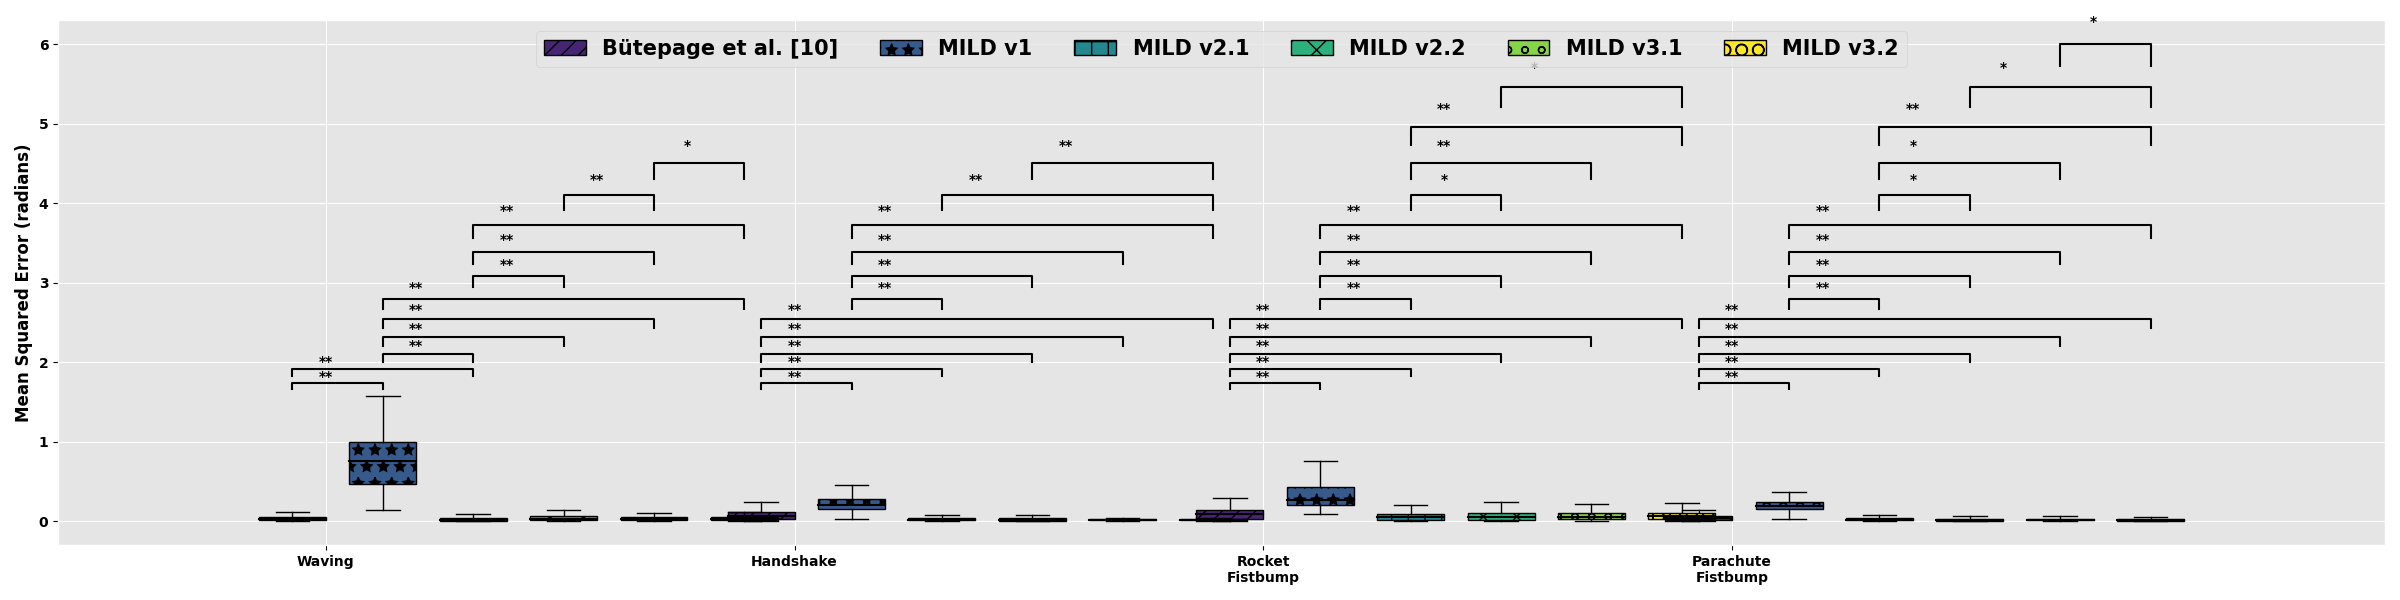

In [4]:
bp_mse = np.load('/home/vignesh/playground/buetepage-phri/logs/mse/nuisipepper_3joints_xvel.npz', allow_pickle=True)['arr_0']
mild_mse = np.load('../logs/mse/nuisiv2_pepper_3joints_xvel_old.npz', allow_pickle=True)['arr_0']
mse = np.concatenate([bp_mse[None], mild_mse], axis=0)


width = 1/(len(mse)+1)
spacing = width+0.05
colors = get_cmap()(np.linspace(0.1,1,len(mse)))
boxplot_kwargs = dict(
	showfliers=False, widths=[width], patch_artist = True,
	medianprops = dict(color = "black", linewidth = 1.5),
	vert=True,
)
legend_props = { "size": 15, "weight":"bold" }

hatches = ['//','*', '+', 'x', 'o', 'O']
actions = ['Waving', 'Handshake', 'Rocket\nFistbump', 'Parachute\nFistbump']
# methods = ['Bütepage et al. [10]', 'MILD']
methods = ['Bütepage et al. [10]', 'MILD v1', 'MILD v2.1', 'MILD v2.2', 'MILD v3.1', 'MILD v3.2']


fig1 = plt.figure(figsize=(len(mse)*4, 6))

ax_box = fig1.add_subplot(1,1,1)
boxes = []
box_y = []
ymax_ = -1000
for i in range(len(mse)):
	box_y.append([])
	for a in range(4):
		mse[i, a] = np.array(mse[i, a])
		box = ax_box.boxplot(mse[i, a], positions=[a+i*spacing], boxprops = dict(facecolor=colors[i]), **boxplot_kwargs)
		box["boxes"][0].set(hatch=hatches[i])
		box_y[-1].append(box['whiskers'][1].get_ydata()[1])
		ymax_ = max(box_y[-1][-1], ymax_)
		if a==0:
			boxes.append(box["boxes"][0])


pvalues = np.zeros((4*(len(mse)-1), len(mse)-1))
for a in range(4):
	# d = {'MSE':np.concatenate(mse[:,a])}
	# d['participant'] = np.tile(np.arange(len(mse[0,a])), 6)
	# d['method'] = np.repeat([1,2,3,4,5,6], len(mse[0,a]))
	d = {'MSE':np.concatenate(mse[[0,2,3,4,5],a])}
	d['participant'] = np.tile(np.arange(len(mse[0,a])), 5)
	d['method'] = np.repeat([1,2,3,4,5], len(mse[0,a]))
	df = pd.DataFrame(d)
	anova = AnovaRM(data=df, depvar='MSE', subject='participant', within=['method']).fit().anova_table
	s = 'MSE'
	key = 'method'
	keys = ['F Value', 'Pr > F']
	s += f'\t{anova[keys[0]][key]:.3e}'
	s += f'\t{anova[keys[1]][key]:.3f}'
	# print(s)
	spher, W, chisq, dof, pval = pg.sphericity(data=df, dv='MSE', subject='participant', within='method')
	# print(spher)
	# sm.qqplot(d[labels_to_use[i]], line ='r')
	# py.show()
	# print(AnovaRM(data=df, depvar='MSE', subject='participant', within=['method']).fit().anova_table)
	
	fvalue, pvalue = f_oneway(mse[0,a], mse[1,a], mse[2,a], mse[3,a], mse[4,a], mse[5,a])
	# print(fvalue, pvalue)
	ymax = ymax_
	count = 0
	for i in range(0,len(mse)):
		for j in range(i+1,len(mse)):
			res = mannwhitneyu(mse[i][a], mse[j][a])
			print(a*(len(mse)-1)+i, j-1, f'{res.pvalue:.3e}')
			pvalues[a*(len(mse)-1)+i, j-1] = res.pvalue
			if res.pvalue < 0.05:
				ax_box.plot([a+i*spacing,a+i*spacing,a+j*spacing,a+j*spacing], [ymax*1.05, ymax*1.1, ymax*1.1, ymax*1.05], 'k-')
				if res.pvalue < 0.01:
					ax_box.text(a+i*spacing+width/2, ymax*1.15, '**', horizontalalignment='center', verticalalignment='center')
				else:
					ax_box.text(a+i*spacing+width/2, ymax*1.15, '*', horizontalalignment='center', verticalalignment='center')
				ymax += 0.1*ymax
	# print('')

pvalues[pvalues<0.001] = 0.
s = ''
for a in range(4):
	for i in range(0,len(mse)-1):
		for j in range(i):
			s += '--\t'
		for j in range(i+1,len(mse)):
			if pvalues[a*(len(mse)-1)+i, j-1]== 0:
				s += '0.\t'
			else:
				s += f'{pvalues[a*(len(mse)-1)+i, j-1]:.3f}\t'
		s += '\n'
# for i in range(pvalues.shape[0]):
# 	for j in range(0,i):
# 	for j in range(pvalues.shape[1]):
print(s)
ax_box.set_ylabel('Mean Squared Error (radians)')
ax_box.set_xticks(np.arange(len(actions))+width/2, actions)
ax_box.tick_params(axis='x', colors='black')
ax_box.tick_params(axis='y', colors='black')
ax_box.yaxis.label.set_color('black')
# ax_box.set_yticks(np.arange(5)+1)#, np.arange(5)+1)
# ax_box.set_ylim(-0.1, 15)
# ax_box.set_xlim(-0.3, len(actions)-0.3)
ax_box.legend(boxes, methods, loc='upper center', ncol=len(mse), prop=legend_props)
plt.tight_layout()
plt.savefig('../logs/plots/mse_nuisi_pepper.pdf')
plt.show()


0 0 0.000e+00
0 1 0.000e+00
0 2 0.000e+00
0 3 0.000e+00
0 4 0.000e+00
1 1 5.042e-215
1 2 1.362e-173
1 3 0.000e+00
1 4 0.000e+00
2 2 3.889e-07
2 3 9.876e-21
2 4 4.875e-26
3 3 1.192e-47
3 4 4.268e-54
4 4 1.194e-01
5 0 1.455e-58
5 1 1.341e-40
5 2 1.059e-10
5 3 3.338e-120
5 4 1.227e-133
6 1 1.627e-196
6 2 8.507e-134
6 3 0.000e+00
6 4 0.000e+00
7 2 1.876e-06
7 3 1.791e-49
7 4 3.242e-62
8 3 2.130e-71
8 4 2.922e-86
9 4 4.122e-02
10 0 7.901e-275
10 1 2.907e-01
10 2 8.384e-01
10 3 1.904e-19
10 4 2.146e-33
11 1 3.731e-270
11 2 1.038e-263
11 3 1.917e-307
11 4 0.000e+00
12 2 2.316e-04
12 3 1.272e-33
12 4 1.108e-48
13 3 5.165e-26
13 4 2.998e-40
14 4 9.603e-05
15 0 1.676e-64
15 1 1.354e-45
15 2 3.838e-56
15 3 2.113e-77
15 4 1.590e-91
16 1 3.117e-266
16 2 1.260e-290
16 3 0.000e+00
16 4 0.000e+00
17 2 1.616e-02
17 3 1.439e-09
17 4 1.455e-16
18 3 1.756e-04
18 4 1.537e-09
19 4 1.778e-02
0.	0.	0.	0.	0.	
--	0.	0.	0.	0.	
--	--	0.	0.	0.	
--	--	--	0.	0.	
--	--	--	--	0.119	
0.	0.	0.	0.	0.	
--	0.	0.	0.	0.	
--	

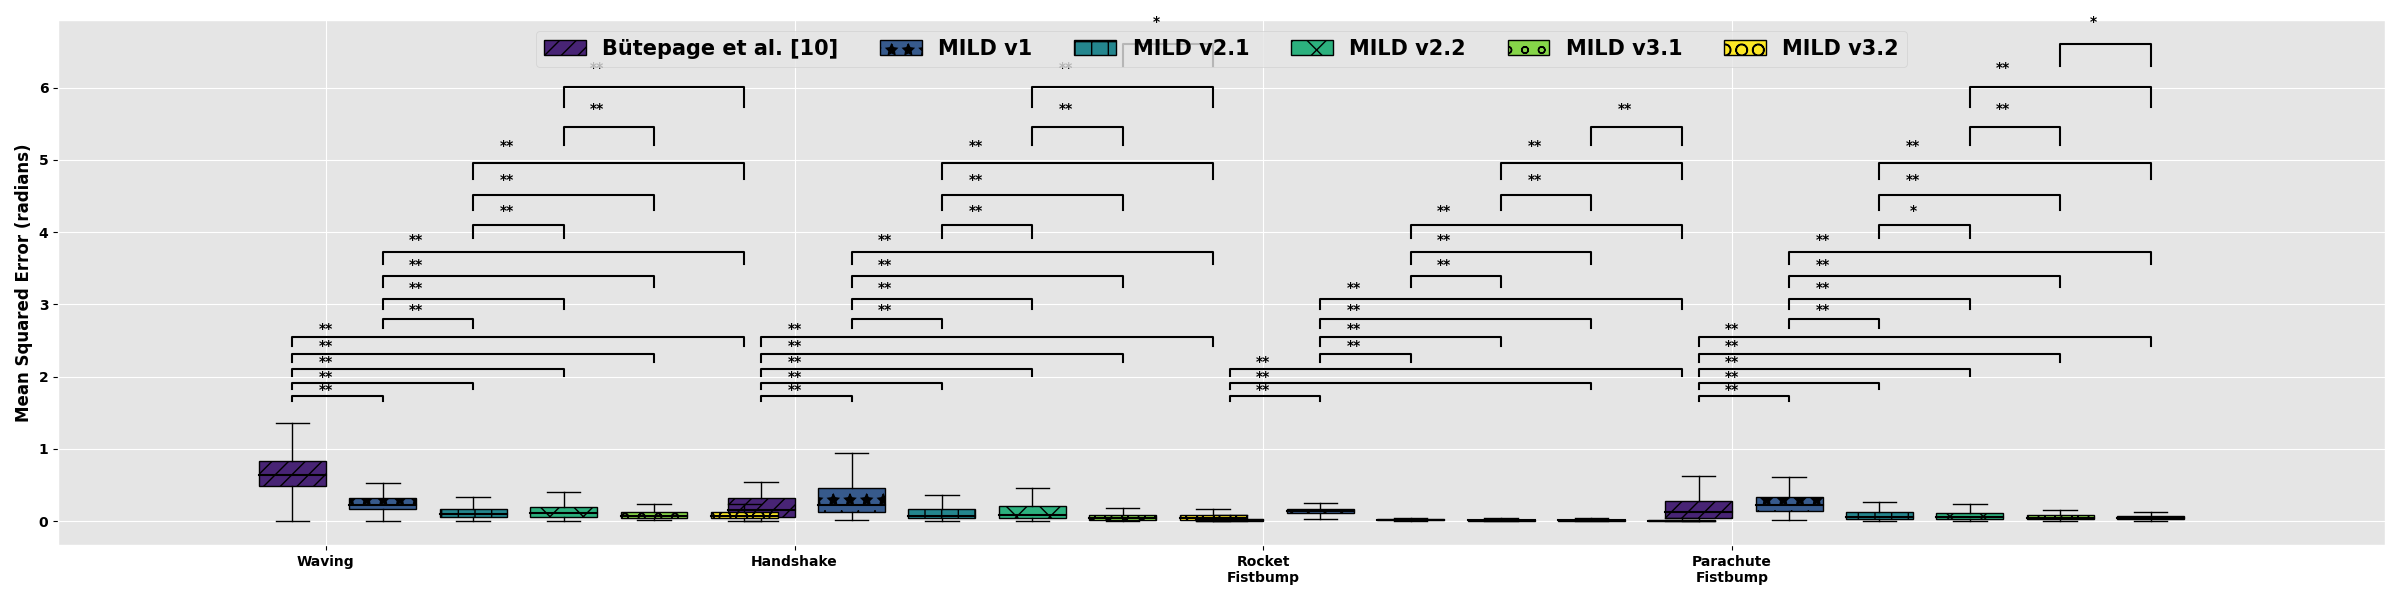

In [5]:
bp_mse = np.load('/home/vignesh/playground/buetepage-phri/logs/mse/bp_pepper_20hz_3joints_xvel.npz', allow_pickle=True)['arr_0']
mild_mse = np.load('../logs/mse/bp_pepper_20hz_3joints_xvel_old.npz', allow_pickle=True)['arr_0']
mse = np.concatenate([bp_mse[None], mild_mse], axis=0)


width = 1/(len(mse)+1)
spacing = width+0.05
colors = get_cmap()(np.linspace(0.1,1,len(mse)))
boxplot_kwargs = dict(
	showfliers=False, widths=[width], patch_artist = True,
	medianprops = dict(color = "black", linewidth = 1.5),
	vert=True,
)
legend_props = { "size": 15, "weight":"bold" }

hatches = ['//','*', '+', 'x', 'o', 'O']
actions = ['Waving', 'Handshake', 'Rocket\nFistbump', 'Parachute\nFistbump']
# methods = ['Bütepage et al. [10]', 'MILD']
methods = ['Bütepage et al. [10]', 'MILD v1', 'MILD v2.1', 'MILD v2.2', 'MILD v3.1', 'MILD v3.2']


fig1 = plt.figure(figsize=(len(mse)*4, 6))

ax_box = fig1.add_subplot(1,1,1)
boxes = []
box_y = []
for i in range(len(mse)):
	box_y.append([])
	for a in range(4):
		mse[i, a] = np.array(mse[i, a])
		box = ax_box.boxplot(mse[i, a], positions=[a+i*spacing], boxprops = dict(facecolor=colors[i]), **boxplot_kwargs)
		box["boxes"][0].set(hatch=hatches[i])
		box_y[-1].append(box['whiskers'][1].get_ydata()[1])
		if a==0:
			boxes.append(box["boxes"][0])

pvalues = np.zeros((4*(len(mse)-1), len(mse)-1))
for a in range(4):
	# d = {'MSE':np.concatenate(mse[:,a])}
	# d['participant'] = np.tile(np.arange(len(mse[0,a])), 6)
	# d['method'] = np.repeat([1,2,3,4,5,6], len(mse[0,a]))
	d = {'MSE':np.concatenate(mse[[0,2,3,4,5],a])}
	d['participant'] = np.tile(np.arange(len(mse[0,a])), 5)
	d['method'] = np.repeat([1,2,3,4,5], len(mse[0,a]))
	df = pd.DataFrame(d)
	anova = AnovaRM(data=df, depvar='MSE', subject='participant', within=['method']).fit().anova_table
	s = 'MSE'
	key = 'method'
	keys = ['F Value', 'Pr > F']
	s += f'\t{anova[keys[0]][key]:.3e}'
	s += f'\t{anova[keys[1]][key]:.3f}'
	# print(s)
	spher, W, chisq, dof, pval = pg.sphericity(data=df, dv='MSE', subject='participant', within='method')
	# print(spher)
	# sm.qqplot(d[labels_to_use[i]], line ='r')
	# py.show()
	# print(AnovaRM(data=df, depvar='MSE', subject='participant', within=['method']).fit().anova_table)
	
	fvalue, pvalue = f_oneway(mse[0,a], mse[1,a], mse[2,a], mse[3,a], mse[4,a], mse[5,a])
	# print(fvalue, pvalue)
	ymax = ymax_
	count = 0
	for i in range(0,len(mse)):
		for j in range(i+1,len(mse)):
			res = mannwhitneyu(mse[i][a], mse[j][a])
			print(a*(len(mse)-1)+i, j-1, f'{res.pvalue:.3e}')
			pvalues[a*(len(mse)-1)+i, j-1] = res.pvalue
			if res.pvalue < 0.05:
				ax_box.plot([a+i*spacing,a+i*spacing,a+j*spacing,a+j*spacing], [ymax*1.05, ymax*1.1, ymax*1.1, ymax*1.05], 'k-')
				if res.pvalue < 0.01:
					ax_box.text(a+i*spacing+width/2, ymax*1.15, '**', horizontalalignment='center', verticalalignment='center')
				else:
					ax_box.text(a+i*spacing+width/2, ymax*1.15, '*', horizontalalignment='center', verticalalignment='center')
				ymax += 0.1*ymax
	# print('')

pvalues[pvalues<0.001] = 0.
s = ''
for a in range(4):
	for i in range(0,len(mse)-1):
		for j in range(i):
			s += '--\t'
		for j in range(i+1,len(mse)):
			if pvalues[a*(len(mse)-1)+i, j-1]== 0:
				s += '0.\t'
			else:
				s += f'{pvalues[a*(len(mse)-1)+i, j-1]:.3f}\t'
		s += '\n'
# for i in range(pvalues.shape[0]):
# 	for j in range(0,i):
# 	for j in range(pvalues.shape[1]):
print(s)
ax_box.set_ylabel('Mean Squared Error (radians)')
ax_box.set_xticks(np.arange(len(actions))+width/2, actions)
ax_box.tick_params(axis='x', colors='black')
ax_box.tick_params(axis='y', colors='black')
ax_box.yaxis.label.set_color('black')
# ax_box.set_yticks(np.arange(5)+1)#, np.arange(5)+1)
# ax_box.set_ylim(-0.1, 15)
# ax_box.set_xlim(-0.3, len(actions)-0.3)
ax_box.legend(boxes, methods, loc='upper center', ncol=len(mse), prop=legend_props)
plt.tight_layout()
plt.savefig('../logs/plots/mse_bp_pepper.pdf')
plt.show()


0 0 1.059e-83
0 1 2.698e-12
0 2 1.466e-34
0 3 5.584e-25
0 4 2.321e-23
1 1 1.317e-21
1 2 1.502e-13
1 3 2.977e-15
1 4 5.394e-11
2 2 6.378e-06
2 3 2.845e-01
2 4 3.368e-01
3 3 3.939e-04
3 4 2.499e-04
4 4 6.745e-01
5 0 6.791e-31
5 1 3.530e-05
5 2 3.973e-01
5 3 5.285e-10
5 4 1.468e-12
6 1 2.841e-55
6 2 2.282e-54
6 3 9.570e-43
6 4 3.210e-32
7 2 1.811e-02
7 3 3.813e-07
7 4 1.373e-11
8 3 2.593e-11
8 4 3.544e-16
9 4 8.335e-03
10 0 8.122e-47
10 1 1.638e-09
10 2 2.271e-04
10 3 9.760e-01
10 4 9.992e-01
11 1 1.510e-31
11 2 7.765e-46
11 3 2.395e-61
11 4 3.075e-61
12 2 5.556e-04
12 3 1.841e-12
12 4 2.623e-13
13 3 4.478e-05
13 4 1.815e-05
14 4 9.086e-01
15 0 1.136e-31
15 1 1.363e-01
15 2 9.834e-02
15 3 6.843e-32
15 4 9.459e-22
16 1 7.864e-14
16 2 1.181e-14
16 3 5.530e-02
16 4 1.189e-04
17 2 7.852e-01
17 3 4.032e-13
17 4 1.921e-09
18 3 1.454e-12
18 4 2.651e-08
19 4 3.098e-03
0.	0.	0.	0.	0.	
--	0.	0.	0.	0.	
--	--	0.	0.284	0.337	
--	--	--	0.	0.	
--	--	--	--	0.675	
0.	0.	0.397	0.	0.	
--	0.	0.	0.	0.	
--	--	

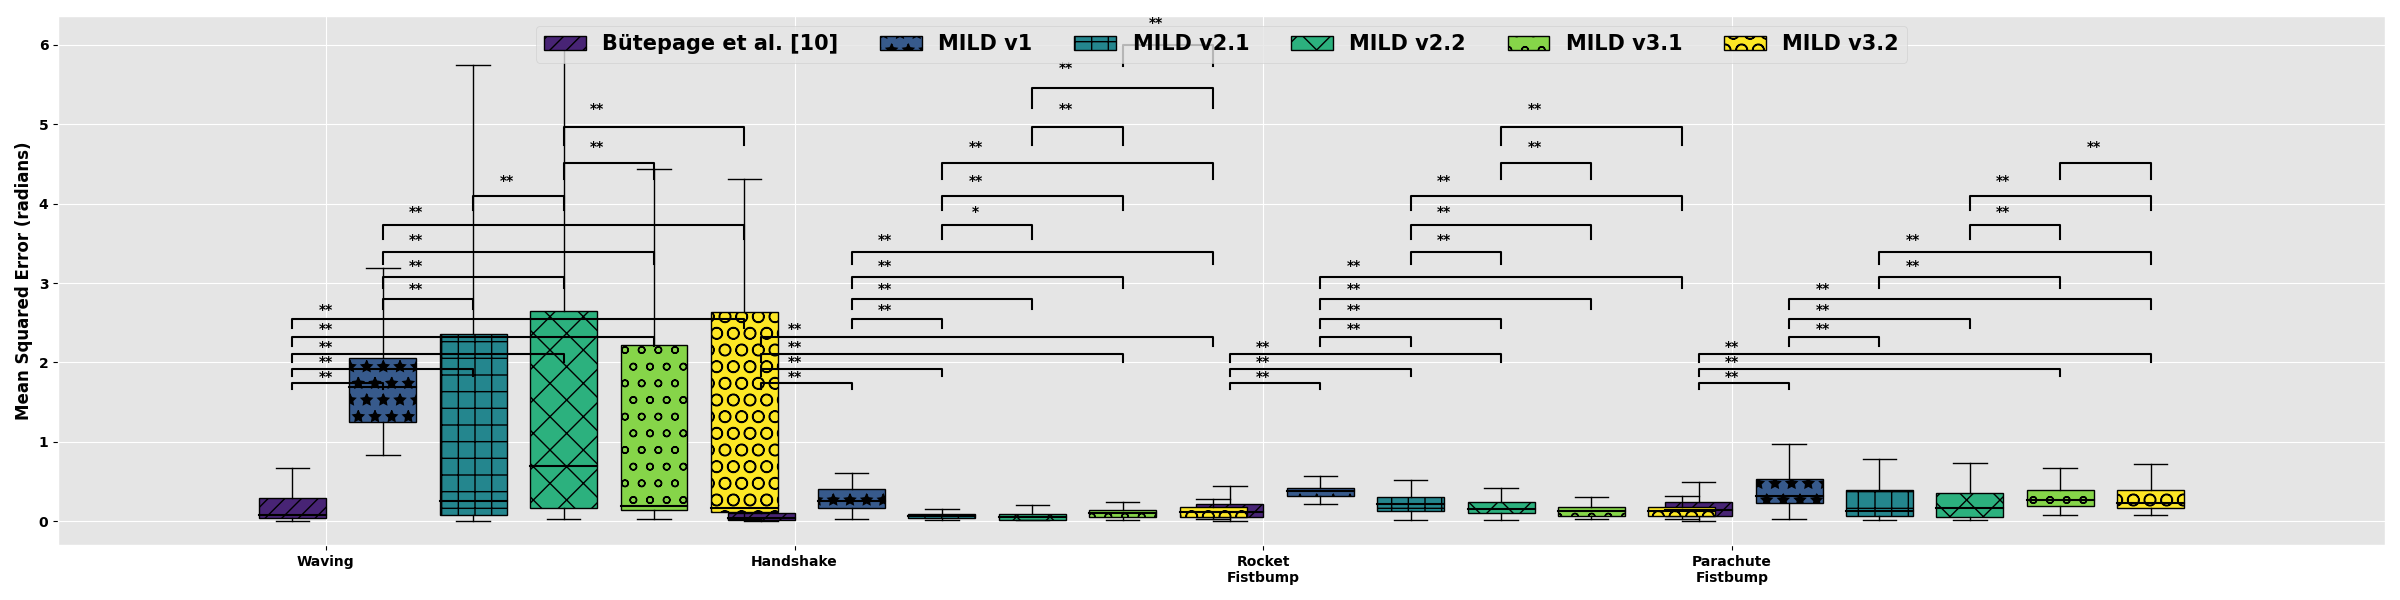

In [6]:
bp_mse = np.load('/home/vignesh/playground/buetepage-phri/logs/mse/yumi_20hz_3joints_xvel.npz', allow_pickle=True)['arr_0']
mild_mse = np.load('../logs/mse/bp_yumi_20hz_3joints_xvel.npz', allow_pickle=True)['arr_0']
mse = np.concatenate([bp_mse[None], mild_mse], axis=0)


width = 1/(len(mse)+1)
spacing = width+0.05
colors = get_cmap()(np.linspace(0.1,1,len(mse)))
boxplot_kwargs = dict(
	showfliers=False, widths=[width], patch_artist = True,
	medianprops = dict(color = "black", linewidth = 1.5),
	vert=True,
)
legend_props = { "size": 15, "weight":"bold" }

hatches = ['//','*', '+', 'x', 'o', 'O']
actions = ['Waving', 'Handshake', 'Rocket\nFistbump', 'Parachute\nFistbump']
# methods = ['Bütepage et al. [10]', 'MILD']
methods = ['Bütepage et al. [10]', 'MILD v1', 'MILD v2.1', 'MILD v2.2', 'MILD v3.1', 'MILD v3.2']


fig1 = plt.figure(figsize=(len(mse)*4, 6))

ax_box = fig1.add_subplot(1,1,1)
boxes = []
box_y = []
for i in range(len(mse)):
	box_y.append([])
	for a in range(4):
		mse[i, a] = np.array(mse[i, a])
		box = ax_box.boxplot(mse[i, a], positions=[a+i*spacing], boxprops = dict(facecolor=colors[i]), **boxplot_kwargs)
		box["boxes"][0].set(hatch=hatches[i])
		box_y[-1].append(box['whiskers'][1].get_ydata()[1])
		if a==0:
			boxes.append(box["boxes"][0])

pvalues = np.zeros((4*(len(mse)-1), len(mse)-1))
for a in range(4):
	# d = {'MSE':np.concatenate(mse[:,a])}
	# d['participant'] = np.tile(np.arange(len(mse[0,a])), 6)
	# d['method'] = np.repeat([1,2,3,4,5,6], len(mse[0,a]))
	d = {'MSE':np.concatenate(mse[[0,2,3,4,5],a])}
	d['participant'] = np.tile(np.arange(len(mse[0,a])), 5)
	d['method'] = np.repeat([1,2,3,4,5], len(mse[0,a]))
	df = pd.DataFrame(d)
	anova = AnovaRM(data=df, depvar='MSE', subject='participant', within=['method']).fit().anova_table
	s = 'MSE'
	key = 'method'
	keys = ['F Value', 'Pr > F']
	s += f'\t{anova[keys[0]][key]:.3e}'
	s += f'\t{anova[keys[1]][key]:.3f}'
	# print(s)
	spher, W, chisq, dof, pval = pg.sphericity(data=df, dv='MSE', subject='participant', within='method')
	# print(spher)
	# sm.qqplot(d[labels_to_use[i]], line ='r')
	# py.show()
	# print(AnovaRM(data=df, depvar='MSE', subject='participant', within=['method']).fit().anova_table)
	
	fvalue, pvalue = f_oneway(mse[0,a], mse[1,a], mse[2,a], mse[3,a], mse[4,a], mse[5,a])
	# print(fvalue, pvalue)
	ymax = ymax_
	count = 0
	for i in range(0,len(mse)):
		for j in range(i+1,len(mse)):
			res = mannwhitneyu(mse[i][a], mse[j][a])
			print(a*(len(mse)-1)+i, j-1, f'{res.pvalue:.3e}')
			pvalues[a*(len(mse)-1)+i, j-1] = res.pvalue
			if res.pvalue < 0.05:
				ax_box.plot([a+i*spacing,a+i*spacing,a+j*spacing,a+j*spacing], [ymax*1.05, ymax*1.1, ymax*1.1, ymax*1.05], 'k-')
				if res.pvalue < 0.01:
					ax_box.text(a+i*spacing+width/2, ymax*1.15, '**', horizontalalignment='center', verticalalignment='center')
				else:
					ax_box.text(a+i*spacing+width/2, ymax*1.15, '*', horizontalalignment='center', verticalalignment='center')
				ymax += 0.1*ymax
	# print('')

pvalues[pvalues<0.001] = 0.
s = ''
for a in range(4):
	for i in range(0,len(mse)-1):
		for j in range(i):
			s += '--\t'
		for j in range(i+1,len(mse)):
			if pvalues[a*(len(mse)-1)+i, j-1]== 0:
				s += '0.\t'
			else:
				s += f'{pvalues[a*(len(mse)-1)+i, j-1]:.3f}\t'
		s += '\n'
# for i in range(pvalues.shape[0]):
# 	for j in range(0,i):
# 	for j in range(pvalues.shape[1]):
print(s)
ax_box.set_ylabel('Mean Squared Error (radians)')
ax_box.set_xticks(np.arange(len(actions))+width/2, actions)
ax_box.tick_params(axis='x', colors='black')
ax_box.tick_params(axis='y', colors='black')
ax_box.yaxis.label.set_color('black')
# ax_box.set_yticks(np.arange(5)+1)#, np.arange(5)+1)
# ax_box.set_ylim(-0.1, 15)
# ax_box.set_xlim(-0.3, len(actions)-0.3)
ax_box.legend(boxes, methods, loc='upper center', ncol=len(mse), prop=legend_props)
plt.tight_layout()
plt.savefig('../logs/plots/mse_bp_pepper.pdf')
plt.show()


# "MILD" - Standard VAE Loss
$$\mathcal{L}_t = \mathbb{E}_{q_h}\log p(\boldsymbol{x}^h_t|\boldsymbol{z}^h_t) + \mathbb{E}_{q_r}\log p(\boldsymbol{x}^r_t|\boldsymbol{z}^r_t) + \mathcal{L}_{KL}$$

The following  use an additional conditional reconstruction term $\mathcal{L}_{cond} = \mathbb{E}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)$
They mainly differ in how the expectation is calculated w.r.t $\boldsymbol{\hat{z}}^r_t$, specifically which distribution is used for Monte Carlo sampling. We then calculate the reconstruction loss for the sampled points.

# Cond. Samples
- Samples are drawn from the HMM conditional distribution.
- Calculate the posterior distribution $\boldsymbol{\mu}_{\boldsymbol{z}}(\boldsymbol{x}^h_t),\boldsymbol{\Sigma}_{\boldsymbol{z}}(\boldsymbol{x}^h_t) = q(\boldsymbol{z}^h_t|\boldsymbol{x}^h_t)$
- Calculate the conditional distribution using the posterior mean and sample $\boldsymbol{\hat{z}}^r_t$ from this.
$$
  \boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i})^{-1} \\
    \boldsymbol{\hat{\mu}}^r_i = {\color{orange}\boldsymbol{\mu}^{r}_i} + \boldsymbol{K}_i({\color{orange}\boldsymbol{\mu}^h_i} - {\color{magenta}\boldsymbol{\mu}_{\boldsymbol{z}}(\boldsymbol{x}^h_t)})\\
    \boldsymbol{\hat{\Sigma}}^r_i = {\color{orange}\boldsymbol{\Sigma}^{rr}_i} - \boldsymbol{K}_i{\color{orange}\boldsymbol{\Sigma}^{hr}_i} + \boldsymbol{\hat{\mu}}^r_i(\boldsymbol{\hat{\mu}}^r_i)^T\\
    \boldsymbol{\hat{\mu}}^r_t = \sum_{i=1}^N {\color{orange}\bar \alpha_i^t} \hspace{0.2em} \boldsymbol{\hat{\mu}}^r_i\\
    \boldsymbol{\hat{\Sigma}}^r_t = \left[\sum_{i=1}^N {\color{orange}\bar \alpha_i^t} \hspace{0.2em} \boldsymbol{\hat{\Sigma}}^r_i\right]  - \boldsymbol{\hat{\mu}}^r_t(\boldsymbol{\hat{\mu}}^r_t)^T\\
    p(\boldsymbol{z}_t^r | q_t^h) = \mathcal{N}(\boldsymbol{z}^r_t;\boldsymbol{\hat{\mu}}^r_t, \boldsymbol{\hat{\Sigma}}^r_t) \\
    \mathcal{L}_{cond} = \mathbb{E}_{\boldsymbol{\hat{z}}^r_t \sim p(\boldsymbol{z}_t^r | q_t^h)}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)
$$

# Diagonalized Cond. Samples
Same as above but using the diagonalized form of the conditional distribution covariance
$$p(\boldsymbol{z}_t^r | q_t^h) = \mathcal{N}(\boldsymbol{z}^r_t;\boldsymbol{\hat{\mu}}^r_t, diag(\boldsymbol{\hat{\Sigma}}^r_t))$$

# Posterior Sample Conditioning 
$$
{\color{magenta}\boldsymbol{z}^h_t} \sim q(\boldsymbol{z}^h_t|\boldsymbol{x}^h_t)\\
\boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i})^{-1} \\
    \boldsymbol{\hat{z}}^r_t = \sum_{k=1}^K {\color{orange}\bar \alpha_i^t} [{\color{orange}\boldsymbol{\mu}^{r}_i} + \boldsymbol{K}_i({\color{orange}\boldsymbol{\mu}^h_i} - {\color{magenta}\boldsymbol{z}^h_t})]\\
    \mathcal{L}_{cond} = \mathbb{E}_{\boldsymbol{\hat{z}}^r_t| \boldsymbol{z}^h_t \sim q(\boldsymbol{z}^h_t | \boldsymbol{x}^h_t)}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)
$$


# "with Post. Cov."
This implies Conditioning with the Posterior Covariance
$$\boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i} + {\color{magenta}\boldsymbol{\Sigma}_{\boldsymbol{z}}(\boldsymbol{x}^h_t)})^{-1}$$